# EDA - Vizualizáció (a Pandas csomag segítségével)

Az EDA vizualizációs technikák megismeréséhez használjuk az *iris* adathalmazt, illetve néhány BUX értéket tartalmazó adathalmazt! Mivel a vizualizációs technikákat a **pandas** és **matplotlib** csomagokból fogjuk  áttekinteni, ezért töltsük be ezeket a függvénykönyvtárat is!

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

iris = pd.read_csv('iris.txt', 
                   sep=';',
                   decimal=',',
                   names=['slength', 'swidth', 'plength', 'pwidth', 'iclass'])

bux = pd.read_csv('BUX_1ho.txt', 
                   sep='\t',
                   decimal=',',
                   header=0)
bux['datum'] = pd.to_datetime(bux['datum'], format='%Y.%m.%d')

Kukkantsunk bele a *bux* DataFrame-be, hogy tudjuk milyen adatokkal fogunk dolgozni.

In [2]:
bux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   datum   21 non-null     datetime64[ns]
 1   kezdo   21 non-null     float64       
 2   zaro    21 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 632.0 bytes


In [3]:
bux.head()

,datum,kezdo,zaro
0,2017-09-01,38086.0000,37719.8984
1,2017-09-04,37707.3906,37465.2617
2,2017-09-05,37471.5117,37736.1016
3,2017-09-06,37723.5898,37878.8594
4,2017-09-07,37878.8594,37783.5117


## Vonaldiagram

Ha diagramra gondolunk, akkor gyakran a vonaldiagram jut eszünkbe. A BUX index alakulását a beolvasott időintervallumban például a következőképpen tudjuk ábrázolni: a *plot()* függvénnyel kirajzoltatjuk a 2 diagramot, majd a *gcf()* visszaadja az aktuális Figure-t, melyen az *autofmt_xdate()* metódus az x tengely feliratainak irányát és elhelyezkedését állítja be oly módon, hogy az jobban olvasható legyen. 

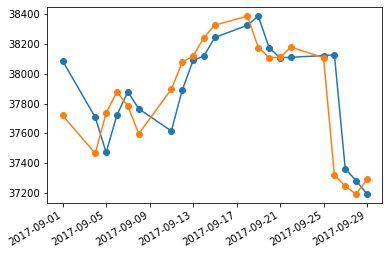

In [4]:
plt.plot(bux['datum'], bux['kezdo'], marker='o')
plt.plot(bux['datum'], bux['zaro'], marker='o')
plt.gcf().autofmt_xdate()
plt.show()

A  DataFrame, vagy Series objektumon meghívott *df.plot()* metódus tulajdonképpen egy egyszerű wrapper a *plt.plot()* metódusa körül. Használatával azonban nagyon látványos eredményeket érhetünk el.

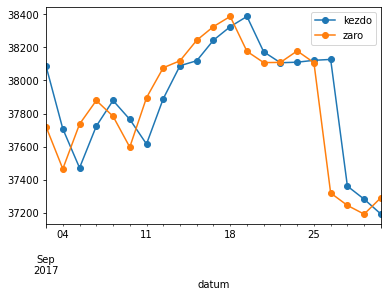

In [5]:
bux.plot(x='datum', marker='o')
plt.show()

## Pont-pont diagram

Könnyen készíthetünk pont-pont diagramot is, oly módon, hogy a *df.plot()* alapértelmezett típusát (*kind='line'*) *kind='scatter'* értékre állítjuk.  

Próbaként ábrázoljuk a csészelevél hosszának függvényében a csészelevél szélességét! 

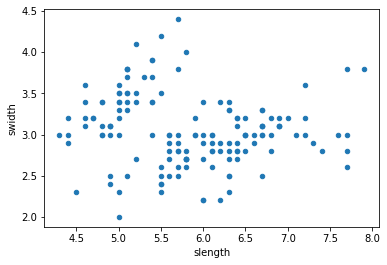

In [6]:
iris.plot(kind='scatter', x='slength', y='swidth')
plt.show()

A 0.17.0-ás verziótól kezdődően ezt a következő szintaktikával is megvalósíthatjuk:

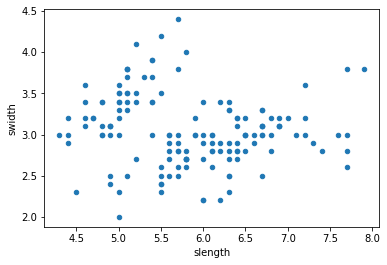

In [7]:
iris.plot.scatter(x='slength', y='swidth')
plt.show()

Vigyünk fel plussz információt a diagramra oly módon, hogy a jelölők mérete legyen arányos a sziromlevél hosszával (a méret pontosan a sziromlevél hosszának 10-szerese legyen).

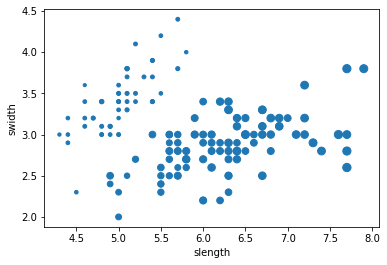

In [8]:
iris.plot.scatter(x='slength', y='swidth', s=iris.plength*10)
plt.show()

Újabb információként jelenítsük meg a diagramon az egyes egyedek fajtáját is! Ehhez már kicsit trükköznünk kell:

{'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'}


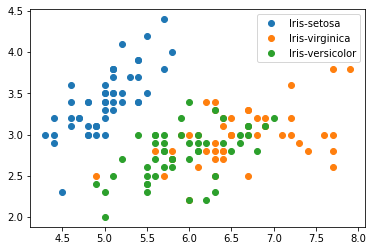

In [9]:
names = set(iris['iclass'])
print(names)
for name in names:
    cond = iris['iclass'] == name
    plt.plot(iris.slength[cond], iris.swidth[cond], 
             linestyle='none', marker='o', label=name)
plt.legend(numpoints=1)
plt.show()

## Oszlopdiagramok

Az oszlopdiagram szintén széles körben elterjedt, gyakran használt diagramtípus. A *plot()* metódus *kind='bar'* paraméterbeállításával, illetve az erre épülő wrapperrel egyszerűen hozhatunk létre oszlopdiagramokat.

Példaként ábrázoljuk oszlopdiagramon az eső 10 iris virág csésze- és sziromlevél adatait.

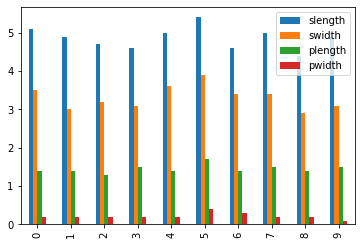

In [10]:
iris.head(10).plot(kind='bar')
plt.show()

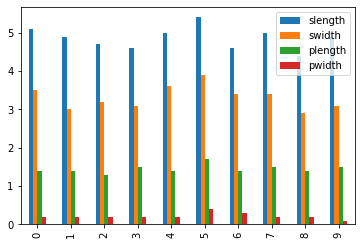

In [11]:
iris.head(10).plot.bar()
plt.show()

Amennyiben horizontális oszlopdiagramot szeretnénk használni, akkor a *'bar'* érték, illetve wrapper helyett a *barh'*-t kell használnunk.

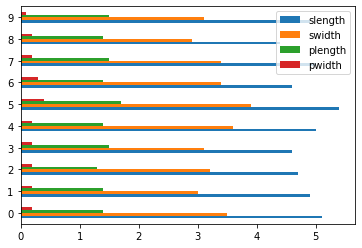

In [12]:
iris.head(10).plot.barh()
plt.show()

Halmozott oszlopdiagram esetén a *stacked* paraméter értékét kell *True* értékre állítani.

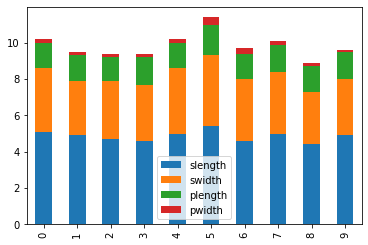

In [13]:
iris.head(10).plot.bar(stacked=True)
plt.show()

Gyakorlásként kipróbálhatjuk, hogy hogyan valósíthatjuk meg:
- ha csak a csészelevél értékeit szeretnénk ábrázoljuk oszlopdiagramon, 
- illetve ha csak az 1., 50. és 100. egyedek első két numerikus adatát szeretnénk vizualizálni.

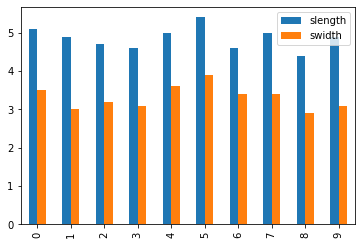

In [14]:
iris[['slength', 'swidth']].head(10).plot.bar()
plt.show()

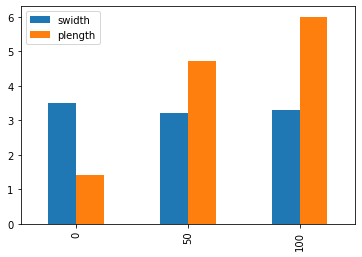

In [15]:
iris.iloc[[0, 50, 100], [1, 2]].plot.bar()
plt.show()

## Hisztogram

A numerikus értékekt hisztogramját könnyedén elkészíthetjük a *kind='hist'* paraméterbeállítással, illetve a ráépülő wrapperekkel.

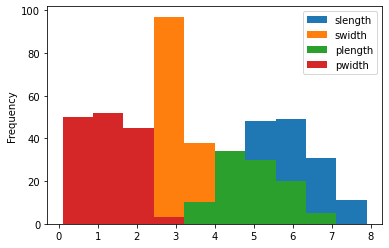

In [16]:
iris.plot.hist()
plt.show()

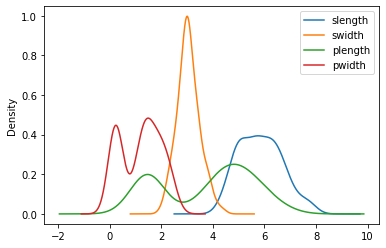

In [17]:
iris.plot.density()
plt.show()

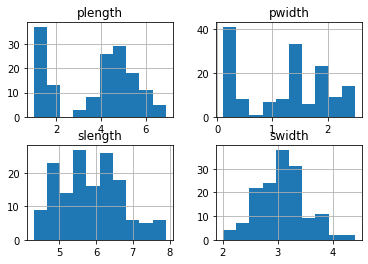

In [18]:
iris.hist()
plt.show()

Ha az alapértelemezett értéktől eltérő számú vödröt szeretnénk használni, akkor a *bins* paraméter értékét kell megfelelően beállítanunk:

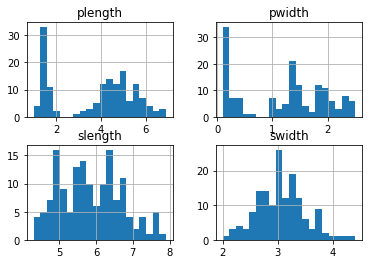

In [19]:
iris.hist(bins=20)
plt.show()

## Box-plot diagram

A box-plot könnyen gyors áttekintést nyújt számunkra a folytonos értékek kvantiliseiről.

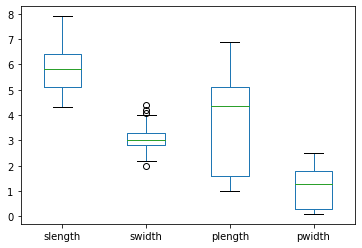

In [20]:
iris.plot.box()
plt.show()

Megfelelő paraméterbeállításokkal könnyedén elérhetjük akár azt is, hogy az egyes dobozdiagramok külön-külön jelenjenek meg:

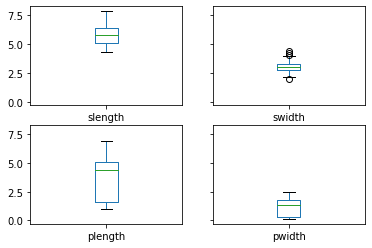

In [21]:
iris.plot.box(subplots=True, layout=(2,2), sharex=False, sharey=True)
plt.show()

Az adatokon könnyedén képezhetünk alcsoportokat, s ezen alcsoportokra külön-külön is elkészíthetjük a dobozdiagramot a **boxplot** wrapperrel. (Bár a plot metódusra épített *box()* wrapper is lehetővé tenné ezt ([DataFrame.plot.box()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.box.html)), nekem mégsem sikerült ugyanezt az eredményt elérnem vele.)  

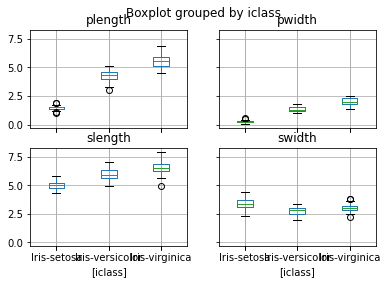

In [22]:
iris.boxplot(by='iclass')
plt.show()

## Pont-pont mátrix

A pont-pont mátrix diagrammal minden folytonos értékű attribútumpárra elkészíthetjük a pont-pont diagramot. Mivel íly módon a mátrix átlója nem értelmezhető, ezér ott gyakran az  attribútumra jellemző hisztogram jelenik meg. Pont-pont mátrix ábrát a **pd.plotting.scatter_matrix()** metódussal készíthetünk.

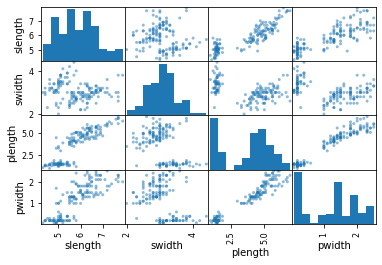

In [23]:
pd.plotting.scatter_matrix(iris)
plt.show()

## Párhuzmos tengelyek

A párhuzamos tengelyek ábrája rendkívül informatív a csoportok összehasonlítása terén és Pythonban nagyon gyorsan el is készíthető:

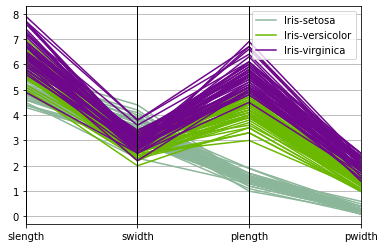

In [24]:
pd.plotting.parallel_coordinates(iris, 'iclass')
plt.show()

## Radviz

Hasonlóan könnyen készíthetünk Radviz ábrát is:

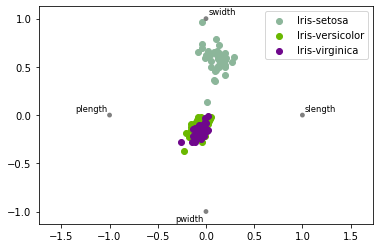

In [25]:
pd.plotting.radviz(iris, 'iclass')
plt.show()

## Haladóbb lehetőségek

Természesetesen tetszőlegesen összetett diagramokat is készíthetünk egy Figure-n belül. Ez esetben létre kell hozni a **Figure** példányt, majd annak különböző **axes** objektumain különféle diagramokat készíthetünk el.

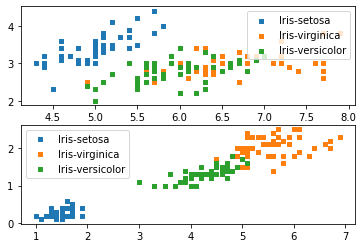

In [26]:
names = set(iris['iclass'])
fig1 = plt.figure()

ax1 = fig1.add_subplot(211)  # two rows 1 column first plot
for name in names:
    cond = iris['iclass'] == name
    ax1.scatter(iris.slength[cond], iris.swidth[cond], s=10, marker='s', label=name)
ax1.legend()

ax2 = fig1.add_subplot(212)
for name in names:
    cond = iris['iclass'] == name
    ax2.scatter(iris.plength[cond], iris.pwidth[cond], s=10, marker='s', label=name)
ax2.legend()
plt.show()

## Összefoglalás

A **matplotlib.pyplot** könyvtár **plot()** metódusa mindennek az ősatyja, számos grafikontípus ábrázolását teszi lehetővé. Ezen metódus wrappere a **df.plot()** eljárás, amely a következő diagramtípusok vizualizálását támogatja:
- 'line’ : line plot (default)
- [‘bar’ : vertical bar plot](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-barplot)
- [‘barh’ : horizontal bar plot](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-barplot)
- [‘hist’ : histogram](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-hist)
- [‘box’ : boxplot](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box)
- [‘kde’ : Kernel Density Estimation plot](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-kde)
- ‘density’ : same as ‘kde’
- [‘area’ : area plot](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-area-plot)
- [‘pie’ : pie plot](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-pie)
- [‘scatter’ : scatter plot](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-scatter)
- [‘hexbin’ : hexbin plot](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-hexbin)   
   
A 0.17.0-ás verziótól kezdve a *pd.plot()* *kind* paraméterének beállítása helyett haszálhatjuk a *df.plot.&lt;kind>* metódusokat is. 

A könnyebb használat végett azonban számos további wrapper is készült, mint pédául a **df.boxplot()**, vagy a **pandas.plotting()** metódusok, melyek közül az utóbbi a következő diagramtípusokat támogatja:

- [Scatter Matrix](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-scatter-matrix)
- [Andrews Curves](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-andrews-curves)
- [Parallel Coordinates](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-parallel-coordinates)
- [Lag Plot](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-lag)
- [Autocorrelation Plot](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-autocorrelation)
- [Bootstrap Plot](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-bootstrap)
- [RadViz](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-radviz)

A pandas adatvizualizációs lehetőségeiről [itt](https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) találunk részletesebb ismertetést, amely tartalmazza a [formázási lehetőségek rövid összefoglalóját](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plot-formatting) is.

 ----------------------------------------
 

# Adatvizualizáció a seaborn csomag segítségével

A *matplotlib* alapú [Seaborn](https://seaborn.pydata.org/) függvénykönyvtár számos hasznos funkcióval támogatja az adatok vizualizációját. Érdemes alaposan körbenézni benne, mivel számos olyan funkciót is találunk, amely a *matplotlib* könyvtárban nem érhető el, illetve számos funkciót könnyebben tudunk a segítségével megvalósítani.

## Violin plot

Amennyiben violin plotot szeretnénk ábrázolni, akkor a **seaborn** csomagot segítségével gyorsan és könnyen meg tudjuk tenni:

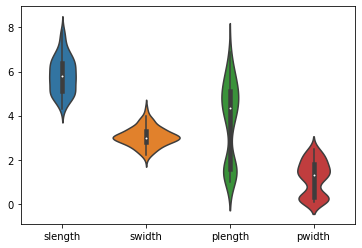

In [27]:
import seaborn as sns

sns.violinplot(data=iris)

# Hasznos linkek

- [Medium: Advanced Visualization for Data Scientists with Matplotlib](https://medium.com/sfu-big-data/advanced-visualization-for-data-scientists-with-matplotlib-15c28863c41c)
- [Medium: Data Visualisation Using Seaborn](https://medium.com/@mukul.mschauhan/data-visualisation-using-seaborn-464b7c0e5122)
- [Medium: Visual Storytelling with Seaborn](https://medium.com/swlh/visual-storytelling-with-seaborn-28dc548dbc4b)
- [Medium: Handy Data Visualization Functions in matplotlib & Seaborn to Speed Up Your EDA](https://medium.com/better-programming/handy-data-visualization-functions-in-matplotlib-seaborn-to-speed-up-your-eda-241ba0a9c47d)
- [Towards Data Science: Understanding Boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)